# 기초통계

1. 기술통계
> 기술통계를 위한 패키지

In [1]:
import numpy as np
import pandas as pd

> 기술 통계량 구하기

In [2]:
x = [1,2,3,4,5,6,7,8,9,10]
len(x)
print('평균 =',np.mean(x))
print('분산 =',np.var(x))
print('표준편차 =',np.std(x))
print('최대값 =',np.max(x))
print('최소값 =',np.min(x))
print('중앙값 =',np.median(x))
print('1사분위수 =',np.percentile(x,25))
print('중앙값 =',np.percentile(x,50))
print('3사분위수 =',np.percentile(x,75))


평균 = 5.5
분산 = 8.25
표준편차 = 2.8722813232690143
최대값 = 10
최소값 = 1
중앙값 = 5.5
1사분위수 = 3.25
중앙값 = 5.5
3사분위수 = 7.75


In [3]:
df = pd.DataFrame(x)
df.describe()

,0
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


2. 분포 그리기

> pdf(확률밀도함수)
$$ N(x|mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}{exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]} $$

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


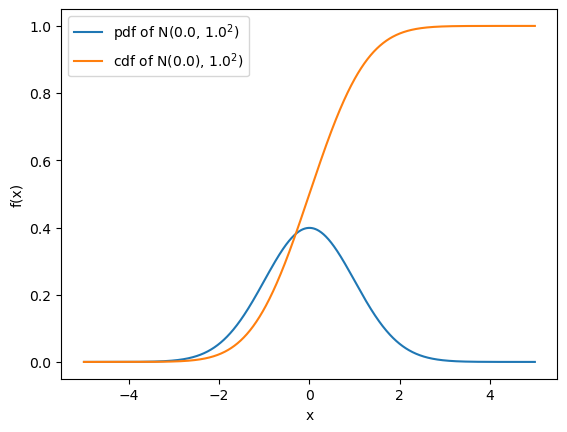

In [5]:
from scipy.special import erf # erf : 가우스 오차함수
mu = 0.0
sigma = 1

x = np.linspace(-5,5,1000)
y = (1/np.sqrt(2*np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2*sigma**2))
y_cum = 0.5 * (1+erf((x-mu)/np.sqrt(2*sigma**2)))

plt.plot(x,y, label = 'pdf of N(%.1f, %.1f$^2$)'%(mu,sigma))
plt.plot(x,y_cum, label = 'cdf of N(%.1f), %.1f$^2$)'%(mu,sigma))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc = 'best')
plt.show()

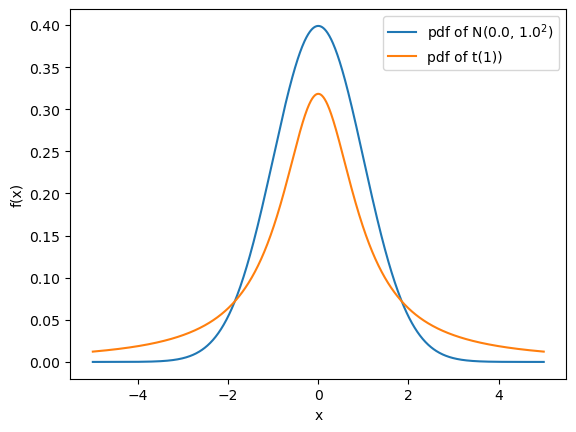

In [6]:
# t 분포
import scipy.stats as st

dof = 1 # 5 10 15 20 25 30 ... 
mu = 0.0
sigma = 1.0

x = np.linspace(-5,5,1000)
y_normal = st.norm(mu,sigma).pdf(x)
y_t = st.t(dof).pdf(x)

plt.plot(x,y_normal, label = 'pdf of N(%.1f, %.1f$^2$)'%(mu,sigma))
plt.plot(x,y_t, label = f'pdf of t({dof}))')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc = 'best')
plt.show()

---

3. plotly\
https://plotly.com/graphing-libraries/

In [7]:
# import plotly.express as px # 그래프 하나만 그림
import plotly.graph_objs as go # 중첩 그래프를 그리기 위해

dof = 10
mu = 0.0
sigma = 1.0

x = np.linspace(-5,5,1000)
y_normal = st.norm(mu,sigma).pdf(x)
y_t = st.t(dof).pdf(x)

fig = go.Figure()
fig.add_scatter(x=x,y=y_normal, name = 'pdf of N(%d, %d<sup>2</sup>)' %(mu, sigma)) # Marker의 sup을 활용
fig.add_scatter(x=x,y=y_t)
fig.show()

---

4. 정규분포

In [8]:
rand_norm = np.random.normal(5,2,1000) # (평균,분산,개수)
print(rand_norm)

[ 3.94342686e+00  2.77366251e+00  5.86405302e+00  6.12890412e+00
  5.76273565e+00  1.99394847e+00  6.42910359e+00  5.42876013e+00
  6.22228520e+00  5.20810828e+00  4.88557489e+00  3.18238294e+00
  4.68184507e+00  5.64342924e+00  4.79000344e+00  5.78768814e+00
  5.16738457e+00  9.22623987e+00  4.99631599e+00  3.40590016e+00
  5.16206379e+00  8.54616692e+00  6.79311415e+00  4.36805916e+00
  7.10171804e+00  5.73738024e+00  7.48562484e+00  4.74661877e+00
  4.61175949e+00  5.77760653e+00  5.76141781e+00  3.59631969e+00
  6.64600300e+00  2.97004033e+00  6.92737132e+00  5.52857546e+00
  5.38279939e+00  5.87709383e+00  6.70332564e+00  5.42555793e+00
  7.62869808e+00  3.78758325e+00  5.03711465e+00  5.77584957e+00
  6.35051210e+00  5.67886231e+00  8.56865729e-01  3.76038389e+00
  4.94342162e+00  2.89490993e+00  5.56558219e+00  6.90227543e+00
  3.76274370e+00  4.32179931e+00  5.02438154e+00  5.11108151e-01
  7.16607035e+00  6.93108757e+00  1.63553921e+00  4.80048274e+00
  9.76232784e-01  6.86890

<Axes: ylabel='Count'>

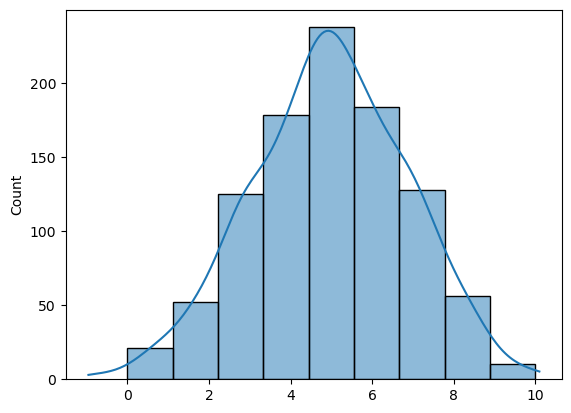

In [9]:
import seaborn as sns
sns.histplot(rand_norm, bins=np.linspace(0,10,10), kde = True)

5. 중심극한정리

In [10]:
import random

rnum = 10 # 모집단 크기
population = list(range(1,rnum+1)) # 모집단 생성
num_sample = 300 # 샘플링 횟수
max_size_sample = len(population) # 최대 표본 크기

In [11]:
df_sampled = pd.DataFrame(columns = ['sample_size', 'num_test', 'sample_mean'])
df_sampled

,sample_size,num_test,sample_mean


In [12]:
for size_sample in range(1,max_size_sample+1):
    for n in range(0,num_sample):
        sample = pd.DataFrame(np.array(random.sample(population,size_sample)))
        sampled = pd.DataFrame({'sample_size' : size_sample, 'num_test' : n, 'sample_mean' : sample.mean()})
        # print(size_sample, n, sampled.mean())
        df_sampled = pd.concat([df_sampled,sampled])
    
df_sampled

,sample_size,num_test,sample_mean
0,1,0,3.0
0,1,1,6.0
0,1,2,7.0
0,1,3,10.0
0,1,4,5.0
...,...,...,...
0,10,295,5.5
0,10,296,5.5
0,10,297,5.5
0,10,298,5.5


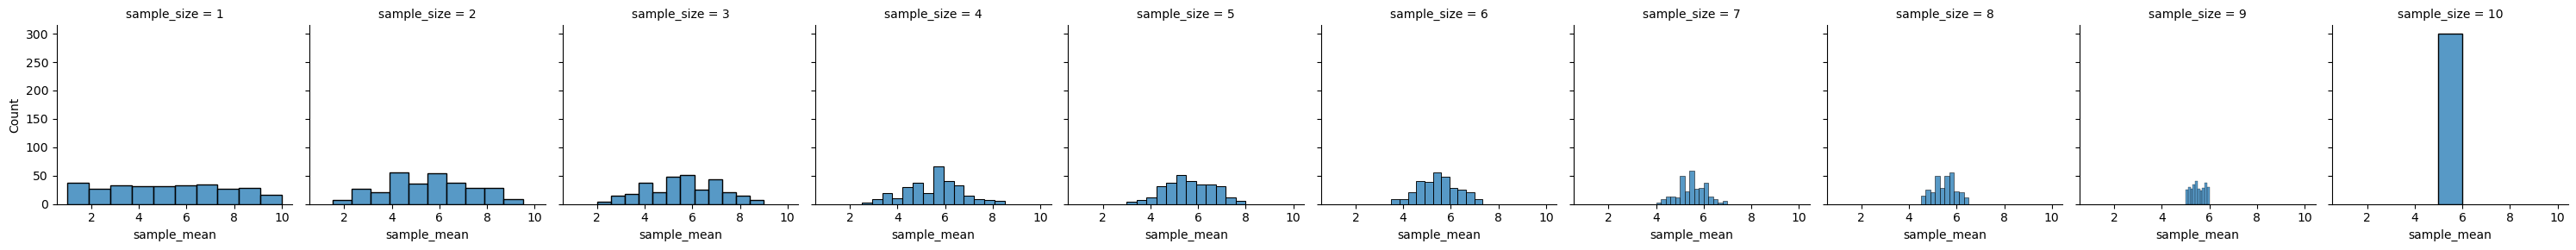

In [13]:
g = sns.FacetGrid(data=df_sampled, col='sample_size')
g.map(sns.histplot, 'sample_mean');

# 추정

1. Scipy
- numpy 기반

In [14]:
# stats 패키지 전체
from scipy import stats

stats.norm.cdf(0)

0.5

In [15]:
# stats 패키지 전체이름 alias
import scipy.stats as st

st.norm.cdf(0)

0.5

In [16]:
# 특정 함수만 로딩
from scipy.stats import norm,t

norm.cdf(0)

0.5

2. 확률변수 다루기
> rvs : 랜덤 변량\
pdf : 확률밀도함수\
cdf : 누적분포함수\
sf : 생존함수\
ppf : 퍼센트 포인트 함수\
isf : 역생존 함수\
stats : 반환 평균 분산\
moment: 분포의 중심이 아닌 모멘트

In [17]:
from scipy.stats import norm

# 평균은 0이고 표준편차는 1인 정규분포
print('평균 =', norm.mean())
print('표준편차 =', norm.var())
print('분산 =', norm.std())

평균 = 0.0
표준편차 = 1.0
분산 = 1.0


In [18]:
# 평균은 0이고 표준편차는 2인 정규분포
print('평균 =', norm.mean(loc = 10, scale = 2))
print('표준편차 =', norm.var(loc = 10, scale = 2))
print('분산 =', norm.std(loc = 10, scale = 2))


평균 = 10.0
표준편차 = 4.0
분산 = 2.0


In [19]:
print(norm.rvs(loc = 0, scale = 2, size = 10))

[-0.28687561  0.74067215  4.04079783  0.94268515 -0.32975027  0.71135473
 -1.38402104  2.7392283  -0.31390459 -0.08743393]


In [20]:
print(norm.pdf(11.0, loc = 10, scale =2 ))
print(norm.pdf([9.0,10.0,11.0],loc = 10, scale = 2))

0.17603266338214976
[0.17603266 0.19947114 0.17603266]


In [21]:
print(norm.cdf(11.0,loc = 10, scale = 2))
print(norm.cdf([9.0,10.0,11.0],loc = 10, scale = 2))

0.6914624612740131
[0.30853754 0.5        0.69146246]


In [22]:
print(norm.sf(11.0, loc = 10, scale = 2))
print(norm.sf([9.0,10.0,11.0],loc = 10, scale = 2))

0.3085375387259869
[0.69146246 0.5        0.30853754]


In [23]:
# ppf의 alpha는 오른쪽부터 기준임을 유의. 즉, 사용시에는 1-alpha를 보여야함
print(norm.ppf(0.05, loc = 10, scale =2))
print(norm.ppf([0.05,0.5,0.95], loc = 10, scale=2))

6.710292746097054
[ 6.71029275 10.         13.28970725]


In [24]:
# t붙포
from scipy.stats import t


print('평균 =',t.mean(df=10))
print('분산 =',t.var(df=10))
print('표준편차 =',t.std(df=10))

평균 = 0.0
분산 = 1.25
표준편차 = 1.118033988749895


In [25]:
print(t.pdf(1.0, df=10))
print(t.pdf([-1.0,0.0,1.0], df = 10))

0.2303619892291386
[0.23036199 0.38910838 0.23036199]


In [26]:
print(t.cdf(1.0,df=10))
print(t.cdf([-1.0,0.0,1.0], df = 10))

0.82955343384897
[0.17044657 0.5        0.82955343]


In [27]:
print(t.sf(1.0, df = 10))
print(t.sf([-1.0,0.0,1.0],df=10))

0.17044656615103004
[0.82955343 0.5        0.17044657]


In [28]:
# 누적 분포
print(t.ppf(0.05,df=10))
print(t.ppf([0.05,0.5,0.95],df=10))

-1.8124611228107341
[-1.81246112e+00  6.80574793e-17  1.81246112e+00]


3. 점추정

In [29]:
import numpy as np

population = np.random.normal(170,10^2, 1000)
print(population[:10])

[180.35600684 154.28124931 164.71810587 165.68239451 163.5328148
 165.22564377 175.92813441 181.55070137 170.2976444  159.86021928]


In [30]:
from scipy.stats import norm

population2 = norm.rvs(loc = 170, scale = 10^2, size = 1000)
print(population2[:10])

[174.61492535 170.78122125 185.6542791  170.16443126 173.49992794
 167.52087617 181.24747353 174.08082596 170.31289912 163.95417271]


<Axes: ylabel='Count'>

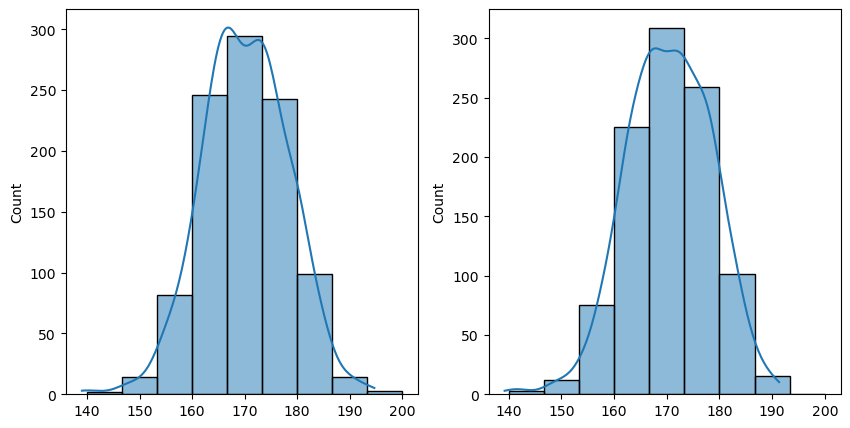

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(1,2, figsize = (10,5))
sns.histplot(population, bins = np.linspace(140,200,10),kde = True, ax=axes[0])
sns.histplot(population2, bins = np.linspace(140,200,10),kde = True, ax=axes[1])

In [32]:
# 표본추출을 통한 점추정
import random
sample = np.array(random.sample(list(population),30))
print(sample)

[176.53568246 175.40783778 175.58654864 160.48702088 179.39278355
 180.61081891 174.47036279 155.1092586  171.66776774 166.59571721
 154.28124931 168.46881183 169.37569902 177.41019809 160.7297412
 167.72693068 167.50454915 170.04045917 156.86423812 179.58683105
 165.73254547 164.84249655 167.16017876 180.35600684 170.3634909
 160.91973385 146.92455775 168.95303948 176.49883464 170.0341713 ]


In [33]:
print(np.mean(sample))
print(np.var(sample,ddof = 1))
print(np.std(sample,ddof = 1))

168.65458539035444
71.76869642659915
8.471640716331114


4. 구간추정

$$ \bar{x}-t_{(\alpha/2,n-1)} \frac{S}{\sqrt{n}} \leq \mu \leq \bar{x}+t_{(\alpha/2,n-1)}\frac{S}{\sqrt{n}} $$

In [34]:
from scipy.stats import t

# 표본크기와 허용오차수준
n = len(sample)
alpha = 0.05

# 1) 표본평균 계산
x_bar = np.mean(sample)
print('표본평균 = ',x_bar)

# 2) 신뢰수준에 따른 t 값 계산
t_value = t.ppf(1-alpha/2, df=n-1)
print('t값 =', t_value)

# 3) 표준오차(표본평균의 표준편차)
se = np.std(sample, ddof=1)/np.sqrt(n)
print('표준오차 =', se)

# 4) 신뢰구간 계산
ci_lower = x_bar-t_value*se
ci_upper = x_bar+t_value*se

print('신뢰구간 = [%.4f, %.4f]' %(ci_lower, ci_upper))

표본평균 =  168.65458539035444
t값 = 2.045229642132703
표준오차 = 1.5467029064712585
신뢰구간 = [165.4912, 171.8179]


In [35]:
from scipy.stats import t

# 표본크기와 허용오차수준
n = len(sample)
alpha = 0.05

# 1) 표본평균 계산
x_bar = np.mean(sample)
print('표본평균 = ',x_bar)

# 2) 표준오차(표본평균의 표준편차)
se = np.std(sample, ddof=1)/np.sqrt(n)
print('표준오차 =', se)

# 3) 신뢰구간 계산
ci_lower, ci_upper = t.interval(1-alpha, df = n-1,loc = x_bar, scale=se)

print('신뢰구간 = [%.4f, %.4f]' %(ci_lower, ci_upper))

표본평균 =  168.65458539035444
표준오차 = 1.5467029064712585
신뢰구간 = [165.4912, 171.8179]


5. 모분산추정

In [36]:
from scipy.stats import chi2

# 표본크기와 허용오차수준
n = len(sample)
alpha = 0.05

# 1) 표본 표준편차 계산
S = np.std(sample, ddof = 1)
print('S =', S)

# 2) 카이제곱 계산 
chi_value1 = chi2.ppf(1-alpha/2, df = n-1)
chi_value2 = chi2.ppf(alpha/2, df = n-1)
print('카이제곱 값 = ', chi_value1, chi_value2)


# 3) 신뢰구간 계산
ci_lower = (n-1)*S**2 / chi_value1
ci_upper = (n-1)*S**2 / chi_value2

print('신뢰구간 = [%.4f, %.4f]' %(ci_lower, ci_upper))

S = 8.471640716331114
카이제곱 값 =  45.72228580417452 16.04707169536489
신뢰구간 = [45.5203, 129.6992]
